In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

Using TensorFlow backend.


In [2]:
data = pd.read_csv("finaldata.csv")

In [3]:
data.tail()

,Date,Cases,Deaths,Recovered
60,4/26/2020,13328,281,3029
61,4/27/2020,14079,301,3233
62,4/28/2020,14885,327,3425
63,4/29/2020,15827,361,4052
64,4/30/2020,16817,385,4315


In [4]:
date = data["Date"].values
cases = data["Cases"].values
deaths = data["Deaths"].values
recovered = data["Recovered"].values
temp1 = []
temp2 = []
temp3 = []
for i in range(len(date)):
    date[i] = i
    if(i == 0):
        temp1.append(cases[0])
        temp2.append(deaths[0])
        temp3.append(recovered[0])
    if(i>0):
        temp1.append(cases[i] - cases[i-1])
        temp2.append(deaths[i] - deaths[i-1])
        temp3.append(recovered[i]-recovered[i-1])
cases = temp1
deaths = temp2
recovered = temp3
date_train = date[0:len(cases)-5]
cases_train = cases[0:len(cases)-5]
deaths_train = deaths[0:len(cases)-5]
recovered_train = recovered[0:len(cases)-5]
date_test = date[len(cases)-8:]
cases_test = cases[len(cases)-8:]
deaths_test = deaths[len(cases)-8:]
recovered_test = recovered[len(cases)-8:]
cases_train = list(zip(date_train, cases_train))
deaths_train = list(zip(date_train, deaths_train))
recovered_train = list(zip(date_train, recovered_train))
cases_test = list(zip(date_test, cases_test))
deaths_test = list(zip(date_test, deaths_test))
recovered_test = list(zip(date_test, recovered_test))
train1 = pd.DataFrame(cases_train, columns=['Date', 'Cases'])
train2 = pd.DataFrame(deaths_train, columns=['Date', 'Deaths'])
train3 = pd.DataFrame(recovered_train, columns=['Date', 'Recovered'])
test1 = pd.DataFrame(cases_test, columns=['Date', 'Cases'])
test2 = pd.DataFrame(deaths_test, columns=['Date', 'Deaths'])
test3 = pd.DataFrame(recovered_test, columns=['Date', 'Recovered'])
train1['Date'] = train1['Date'].astype(float)
train1['Cases'] = train1['Cases'].astype(float)
train2['Date'] = train2['Date'].astype(float)
train2['Deaths'] = train2['Deaths'].astype(float)
train3['Date'] = train3['Date'].astype(float)
train3['Recovered'] = train3['Recovered'].astype(float)
test1['Date'] = test1['Date'].astype(float)
test1['Cases'] = test1['Cases'].astype(float)
test2['Date'] = test2['Date'].astype(float)
test2['Deaths'] = test2['Deaths'].astype(float)
test3['Date'] = test3['Date'].astype(float)
test3['Recovered'] = test3['Recovered'].astype(float)

In [5]:
test1

,Date,Cases
0,57.0,642.0
1,58.0,785.0
2,59.0,783.0
3,60.0,605.0
4,61.0,751.0
5,62.0,806.0
6,63.0,942.0
7,64.0,990.0


In [6]:
num_train = len(date)-5
x_train1 = train1.iloc[:, 1:2].values
scaler1 = MinMaxScaler(feature_range = (0,1))
x_train1 = scaler1.fit_transform(x_train1)
features_set1 = []
labels1 = []
for k in range(3, len(x_train1)):
    features_set1.append(x_train1[k-3:k, 0])
    labels1.append(x_train1[k, 0])
features_set1 = np.array(features_set1)
labels1 = np.array(labels1)
features_set1 = np.reshape(features_set1, (features_set1.shape[0], features_set1.shape[1], 1))

In [7]:
model1 = keras.models.Sequential([
    keras.layers.LSTM(units=100, return_sequences=True, input_shape=(features_set1.shape[1],1)),
    keras.layers.Dropout(0.1),
    keras.layers.LSTM(units=50, return_sequences=True),
    keras.layers.LSTM(units=50, return_sequences=True),
    keras.layers.LSTM(units=50),
    keras.layers.Dense(units=1)
])
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 3, 100)            40800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 100)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 3, 50)             30200     
_________________________________________________________________
lstm_3 (LSTM)                (None, 3, 50)             20200     
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 111,451
Trainable params: 111,451
Non-trainable params: 0
_________________________________________________________________


In [8]:
model1.compile(optimizer = 'adam', loss = 'mean_squared_error')
model1.fit(features_set1, labels1, epochs = 500) 

Epoch 1/500
57/57 [==============================] - 2s 44ms/step - loss: 0.1598
Epoch 2/500
57/57 [==============================] - 0s 455us/step - loss: 0.1499
Epoch 3/500
57/57 [==============================] - 0s 488us/step - loss: 0.1401
Epoch 4/500
57/57 [==============================] - 0s 544us/step - loss: 0.1290
Epoch 5/500
57/57 [==============================] - 0s 483us/step - loss: 0.1181
Epoch 6/500
57/57 [==============================] - 0s 541us/step - loss: 0.1041
Epoch 7/500
57/57 [==============================] - 0s 495us/step - loss: 0.0928
Epoch 8/500
57/57 [==============================] - 0s 432us/step - loss: 0.0794
Epoch 9/500
57/57 [==============================] - 0s 494us/step - loss: 0.0696
Epoch 10/500
57/57 [==============================] - 0s 490us/step - loss: 0.0635
Epoch 11/500
57/57 [==============================] - 0s 580us/step - loss: 0.0645
Epoch 12/500
57/57 [==============================] - 0s 561us/step - loss: 0.0661
Epoch 13/500
5

57/57 [==============================] - 0s 561us/step - loss: 0.0146
Epoch 100/500
57/57 [==============================] - 0s 491us/step - loss: 0.0139
Epoch 101/500
57/57 [==============================] - 0s 491us/step - loss: 0.0142
Epoch 102/500
57/57 [==============================] - 0s 525us/step - loss: 0.0139
Epoch 103/500
57/57 [==============================] - 0s 526us/step - loss: 0.0142
Epoch 104/500
57/57 [==============================] - 0s 488us/step - loss: 0.0143
Epoch 105/500
57/57 [==============================] - 0s 486us/step - loss: 0.0141
Epoch 106/500
57/57 [==============================] - 0s 466us/step - loss: 0.0137
Epoch 107/500
57/57 [==============================] - 0s 527us/step - loss: 0.0144
Epoch 108/500
57/57 [==============================] - 0s 617us/step - loss: 0.0137
Epoch 109/500
57/57 [==============================] - 0s 505us/step - loss: 0.0134
Epoch 110/500
57/57 [==============================] - 0s 525us/step - loss: 0.0139
Epoch 

57/57 [==============================] - 0s 491us/step - loss: 0.0131
Epoch 197/500
57/57 [==============================] - 0s 491us/step - loss: 0.0135
Epoch 198/500
57/57 [==============================] - 0s 492us/step - loss: 0.0128
Epoch 199/500
57/57 [==============================] - 0s 449us/step - loss: 0.0132
Epoch 200/500
57/57 [==============================] - 0s 446us/step - loss: 0.0134
Epoch 201/500
57/57 [==============================] - 0s 699us/step - loss: 0.0130
Epoch 202/500
57/57 [==============================] - 0s 538us/step - loss: 0.0127
Epoch 203/500
57/57 [==============================] - 0s 499us/step - loss: 0.0132
Epoch 204/500
57/57 [==============================] - 0s 505us/step - loss: 0.0129
Epoch 205/500
57/57 [==============================] - 0s 517us/step - loss: 0.0135
Epoch 206/500
57/57 [==============================] - 0s 421us/step - loss: 0.0126
Epoch 207/500
57/57 [==============================] - 0s 645us/step - loss: 0.0132
Epoch 

57/57 [==============================] - 0s 491us/step - loss: 0.0127
Epoch 294/500
57/57 [==============================] - 0s 559us/step - loss: 0.0123
Epoch 295/500
57/57 [==============================] - 0s 491us/step - loss: 0.0130
Epoch 296/500
57/57 [==============================] - 0s 551us/step - loss: 0.0125
Epoch 297/500
57/57 [==============================] - 0s 514us/step - loss: 0.0119
Epoch 298/500
57/57 [==============================] - 0s 399us/step - loss: 0.0128
Epoch 299/500
57/57 [==============================] - 0s 617us/step - loss: 0.0127
Epoch 300/500
57/57 [==============================] - 0s 522us/step - loss: 0.0129
Epoch 301/500
57/57 [==============================] - 0s 570us/step - loss: 0.0121
Epoch 302/500
57/57 [==============================] - 0s 482us/step - loss: 0.0123
Epoch 303/500
57/57 [==============================] - 0s 531us/step - loss: 0.0125
Epoch 304/500
57/57 [==============================] - 0s 484us/step - loss: 0.0120
Epoch 

57/57 [==============================] - 0s 491us/step - loss: 0.0127
Epoch 391/500
57/57 [==============================] - 0s 491us/step - loss: 0.0120
Epoch 392/500
57/57 [==============================] - 0s 562us/step - loss: 0.0128
Epoch 393/500
57/57 [==============================] - 0s 491us/step - loss: 0.0119
Epoch 394/500
57/57 [==============================] - 0s 438us/step - loss: 0.0124
Epoch 395/500
57/57 [==============================] - 0s 593us/step - loss: 0.0120
Epoch 396/500
57/57 [==============================] - 0s 512us/step - loss: 0.0121
Epoch 397/500
57/57 [==============================] - 0s 607us/step - loss: 0.0129
Epoch 398/500
57/57 [==============================] - 0s 571us/step - loss: 0.0128
Epoch 399/500
57/57 [==============================] - 0s 374us/step - loss: 0.0118
Epoch 400/500
57/57 [==============================] - 0s 646us/step - loss: 0.0124
Epoch 401/500
57/57 [==============================] - 0s 411us/step - loss: 0.0123
Epoch 

57/57 [==============================] - 0s 562us/step - loss: 0.0123
Epoch 488/500
57/57 [==============================] - 0s 491us/step - loss: 0.0116
Epoch 489/500
57/57 [==============================] - 0s 491us/step - loss: 0.0118
Epoch 490/500
57/57 [==============================] - 0s 491us/step - loss: 0.0120
Epoch 491/500
57/57 [==============================] - 0s 528us/step - loss: 0.0126
Epoch 492/500
57/57 [==============================] - 0s 503us/step - loss: 0.0121
Epoch 493/500
57/57 [==============================] - ETA: 0s - loss: 0.017 - 0s 463us/step - loss: 0.0123
Epoch 494/500
57/57 [==============================] - 0s 469us/step - loss: 0.0117
Epoch 495/500
57/57 [==============================] - 0s 399us/step - loss: 0.0121
Epoch 496/500
57/57 [==============================] - 0s 633us/step - loss: 0.0121
Epoch 497/500
57/57 [==============================] - 0s 521us/step - loss: 0.0126
Epoch 498/500
57/57 [==============================] - 0s 566us/st

In [9]:
predictions = []
a = test1.iloc[:, 1:2]
for i in range(len(a) - 2):
    test_inputs = a.values
    test_inputs = scaler1.transform(test_inputs)
    test_features = []
    test_features.append(test_inputs[i:i+3,0])
    test_features=np.array(test_features)
    test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))
    prediction = model1.predict(test_features)
    prediction = scaler1.inverse_transform(prediction)
    predictions.append(prediction[0][0])

In [10]:
predictions

[788.20624, 718.13062, 718.7218, 779.68188, 865.25696, 928.53918]

In [33]:
future = []
a = test1.iloc[:, 1:2]
a["Cases"][0] = predictions[3]
a["Cases"][1] = predictions[4]
a["Cases"][2] = predictions[5]
print("Predictions till May 31st for daily cases:")
for i in range(30):
    test_inputs = a.values
    test_inputs = scaler1.transform(test_inputs)
    test_features = []
    test_features.append(test_inputs[0:3,0])
    test_features=np.array(test_features)
    test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))
    prediction = model1.predict(test_features)
    prediction = scaler1.inverse_transform(prediction)
    a["Cases"][0] = a["Cases"][1]
    a["Cases"][1] = a["Cases"][2]
    a["Cases"][2] = prediction[0][0]
    future.append(prediction[0][0])

C:\Users\Ahmad\.conda\envs\tfdeeplearning\lib\site-packages\IPython\core\interactiveshell.py:2862: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


Predictions till May 31st for daily cases:


In [34]:
future

[880.53558,
 876.20325,
 854.2962,
 848.73743,
 840.39398,
 836.85144,
 833.20453,
 831.07349,
 829.25012,
 828.01135,
 827.03076,
 826.31995,
 825.77399,
 825.36743,
 825.05835,
 824.82599,
 824.64966,
 824.51654,
 824.41577,
 824.33936,
 824.28156,
 824.23755,
 824.20435,
 824.1792,
 824.16028,
 824.14581,
 824.13477,
 824.12653,
 824.12024,
 824.1156]

In [13]:
c = []
a  = train1.iloc[:,1:2]
for i in range(len(a) - 2):
    test_inputs = a.values
    test_inputs = scaler1.transform(test_inputs)
    test_features = []
    test_features.append(test_inputs[i:i+3,0])
    test_features=np.array(test_features)
    test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))
    prediction = model1.predict(test_features)
    prediction = scaler1.inverse_transform(prediction)
    c.append(prediction[0][0])

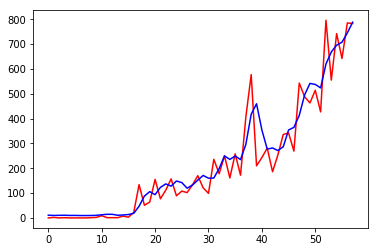

In [14]:
plt.plot(train1.iloc[2:,1:2].values,color='red')
plt.plot(c,color='blue') # Predicted values

In [15]:
d = train1.iloc[2:,1:2]

In [16]:
d.values

array([[   0.],
       [   2.],
       [   0.],
       [   1.],
       [   0.],
       [   0.],
       [   0.],
       [   0.],
       [   1.],
       [   2.],
       [   9.],
       [   1.],
       [   1.],
       [   1.],
       [   7.],
       [   3.],
       [  22.],
       [ 134.],
       [  51.],
       [  64.],
       [ 155.],
       [  77.],
       [ 112.],
       [ 157.],
       [  89.],
       [ 108.],
       [ 102.],
       [ 133.],
       [ 170.],
       [ 121.],
       [  99.],
       [ 236.],
       [ 178.],
       [ 250.],
       [ 161.],
       [ 258.],
       [ 172.],
       [ 407.],
       [ 577.],
       [ 210.],
       [ 243.],
       [ 281.],
       [ 186.],
       [ 254.],
       [ 336.],
       [ 342.],
       [ 269.],
       [ 543.],
       [ 488.],
       [ 463.],
       [ 514.],
       [ 427.],
       [ 796.],
       [ 555.],
       [ 742.],
       [ 642.],
       [ 785.],
       [ 783.]])

In [109]:
test1

,Date,Cases
0,50.0,488.0
1,51.0,463.0
2,52.0,514.0
3,53.0,427.0
4,54.0,796.0
5,55.0,555.0
6,56.0,742.0
7,57.0,642.0


In [17]:
num_train = len(date)-5
x_train2 = train2.iloc[:, 1:2].values
scaler2 = MinMaxScaler(feature_range = (0,1))
x_train2 = scaler2.fit_transform(x_train2)
features_set2 = []
labels2 = []
for k in range(3, len(x_train2)):
    features_set2.append(x_train2[k-3:k, 0])
    labels2.append(x_train2[k, 0])
features_set2 = np.array(features_set2)
labels2 = np.array(labels2)
features_set2 = np.reshape(features_set2, (features_set2.shape[0], features_set2.shape[1], 1))

In [18]:
model2 = keras.models.Sequential([
    keras.layers.LSTM(units=100, return_sequences=True, input_shape=(features_set1.shape[1],1)),
    keras.layers.Dropout(0.1),
    keras.layers.LSTM(units=50, return_sequences=True),
    keras.layers.LSTM(units=50, return_sequences=True),
    keras.layers.LSTM(units=50),
    keras.layers.Dense(units=1)
])
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 3, 100)            40800     
_________________________________________________________________
dropout_2 (Dropout)          (None, 3, 100)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 3, 50)             30200     
_________________________________________________________________
lstm_7 (LSTM)                (None, 3, 50)             20200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 111,451
Trainable params: 111,451
Non-trainable params: 0
_________________________________________________________________


In [19]:
model2.compile(optimizer = 'adam', loss = 'mean_squared_error')
model2.fit(features_set2, labels2, epochs = 500) 

Epoch 1/500
57/57 [==============================] - 3s 45ms/step - loss: 0.1911
Epoch 2/500
57/57 [==============================] - 0s 456us/step - loss: 0.1829
Epoch 3/500
57/57 [==============================] - 0s 487us/step - loss: 0.1740
Epoch 4/500
57/57 [==============================] - 0s 489us/step - loss: 0.1645
Epoch 5/500
57/57 [==============================] - 0s 463us/step - loss: 0.1540
Epoch 6/500
57/57 [==============================] - 0s 491us/step - loss: 0.1426
Epoch 7/500
57/57 [==============================] - 0s 614us/step - loss: 0.1300
Epoch 8/500
57/57 [==============================] - 0s 561us/step - loss: 0.1159
Epoch 9/500
57/57 [==============================] - 0s 557us/step - loss: 0.1066
Epoch 10/500
57/57 [==============================] - 0s 562us/step - loss: 0.0958
Epoch 11/500
57/57 [==============================] - 0s 528us/step - loss: 0.0904
Epoch 12/500
57/57 [==============================] - 0s 561us/step - loss: 0.0937
Epoch 13/500
5

57/57 [==============================] - 0s 458us/step - loss: 0.0246
Epoch 100/500
57/57 [==============================] - 0s 463us/step - loss: 0.0243
Epoch 101/500
57/57 [==============================] - 0s 497us/step - loss: 0.0238
Epoch 102/500
57/57 [==============================] - 0s 493us/step - loss: 0.0245
Epoch 103/500
57/57 [==============================] - 0s 474us/step - loss: 0.0250
Epoch 104/500
57/57 [==============================] - 0s 429us/step - loss: 0.0245
Epoch 105/500
57/57 [==============================] - 0s 542us/step - loss: 0.0249
Epoch 106/500
57/57 [==============================] - 0s 503us/step - loss: 0.0252
Epoch 107/500
57/57 [==============================] - 0s 484us/step - loss: 0.0239
Epoch 108/500
57/57 [==============================] - 0s 499us/step - loss: 0.0245
Epoch 109/500
57/57 [==============================] - 0s 572us/step - loss: 0.0245
Epoch 110/500
57/57 [==============================] - 0s 515us/step - loss: 0.0243
Epoch 

57/57 [==============================] - 0s 491us/step - loss: 0.0245
Epoch 197/500
57/57 [==============================] - 0s 491us/step - loss: 0.0244
Epoch 198/500
57/57 [==============================] - 0s 499us/step - loss: 0.0243
Epoch 199/500
57/57 [==============================] - 0s 398us/step - loss: 0.0243
Epoch 200/500
57/57 [==============================] - 0s 586us/step - loss: 0.0239
Epoch 201/500
57/57 [==============================] - 0s 562us/step - loss: 0.0241
Epoch 202/500
57/57 [==============================] - 0s 518us/step - loss: 0.0246
Epoch 203/500
57/57 [==============================] - 0s 444us/step - loss: 0.0239
Epoch 204/500
57/57 [==============================] - 0s 475us/step - loss: 0.0241
Epoch 205/500
57/57 [==============================] - 0s 452us/step - loss: 0.0244
Epoch 206/500
57/57 [==============================] - 0s 624us/step - loss: 0.0244
Epoch 207/500
57/57 [==============================] - 0s 579us/step - loss: 0.0238
Epoch 

57/57 [==============================] - 0s 421us/step - loss: 0.0239
Epoch 294/500
57/57 [==============================] - 0s 485us/step - loss: 0.0238
Epoch 295/500
57/57 [==============================] - 0s 534us/step - loss: 0.0249
Epoch 296/500
57/57 [==============================] - 0s 501us/step - loss: 0.0241
Epoch 297/500
57/57 [==============================] - 0s 418us/step - loss: 0.0243
Epoch 298/500
57/57 [==============================] - 0s 557us/step - loss: 0.0243
Epoch 299/500
57/57 [==============================] - 0s 563us/step - loss: 0.0235
Epoch 300/500
57/57 [==============================] - 0s 633us/step - loss: 0.0241
Epoch 301/500
57/57 [==============================] - 0s 461us/step - loss: 0.0248
Epoch 302/500
57/57 [==============================] - 0s 552us/step - loss: 0.0243
Epoch 303/500
57/57 [==============================] - 0s 589us/step - loss: 0.0240
Epoch 304/500
57/57 [==============================] - 0s 406us/step - loss: 0.0243
Epoch 

57/57 [==============================] - 0s 456us/step - loss: 0.0237
Epoch 391/500
57/57 [==============================] - 0s 491us/step - loss: 0.0230
Epoch 392/500
57/57 [==============================] - 0s 389us/step - loss: 0.0237
Epoch 393/500
57/57 [==============================] - 0s 645us/step - loss: 0.0236
Epoch 394/500
57/57 [==============================] - 0s 402us/step - loss: 0.0235
Epoch 395/500
57/57 [==============================] - 0s 592us/step - loss: 0.0240
Epoch 396/500
57/57 [==============================] - 0s 541us/step - loss: 0.0236
Epoch 397/500
57/57 [==============================] - 0s 471us/step - loss: 0.0237
Epoch 398/500
57/57 [==============================] - 0s 563us/step - loss: 0.0233
Epoch 399/500
57/57 [==============================] - 0s 393us/step - loss: 0.0243
Epoch 400/500
57/57 [==============================] - 0s 644us/step - loss: 0.0237
Epoch 401/500
57/57 [==============================] - 0s 493us/step - loss: 0.0232
Epoch 

57/57 [==============================] - 0s 561us/step - loss: 0.0158
Epoch 488/500
57/57 [==============================] - 0s 454us/step - loss: 0.0170
Epoch 489/500
57/57 [==============================] - 0s 530us/step - loss: 0.0180
Epoch 490/500
57/57 [==============================] - 0s 504us/step - loss: 0.0153
Epoch 491/500
57/57 [==============================] - 0s 532us/step - loss: 0.0169
Epoch 492/500
57/57 [==============================] - 0s 512us/step - loss: 0.0166
Epoch 493/500
57/57 [==============================] - 0s 477us/step - loss: 0.0159
Epoch 494/500
57/57 [==============================] - 0s 573us/step - loss: 0.0153
Epoch 495/500
57/57 [==============================] - 0s 454us/step - loss: 0.0151
Epoch 496/500
57/57 [==============================] - 0s 541us/step - loss: 0.0162
Epoch 497/500
57/57 [==============================] - 0s 521us/step - loss: 0.0151
Epoch 498/500
57/57 [==============================] - 0s 601us/step - loss: 0.0177
Epoch 

In [20]:
predictions2 = []
a = test2.iloc[:, 1:2]
for i in range(len(a) - 2):
    test_inputs = a.values
    test_inputs = scaler2.transform(test_inputs)
    test_features = []
    test_features.append(test_inputs[i:i+3,0])
    test_features=np.array(test_features)
    test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))
    prediction = model2.predict(test_features)
    prediction = scaler2.inverse_transform(prediction)
    predictions2.append(prediction[0][0])

In [21]:
predictions2

[13.557417, 13.129001, 20.024523, 16.049263, 19.290516, 9.113328]

In [22]:
test2

,Date,Deaths
0,57.0,13.0
1,58.0,16.0
2,59.0,16.0
3,60.0,12.0
4,61.0,20.0
5,62.0,26.0
6,63.0,34.0
7,64.0,24.0


In [23]:
c = []
a  = train2.iloc[:,1:2]
for i in range(len(a) - 2):
    test_inputs = a.values
    test_inputs = scaler2.transform(test_inputs)
    test_features = []
    test_features.append(test_inputs[i:i+3,0])
    test_features=np.array(test_features)
    test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))
    prediction = model2.predict(test_features)
    prediction = scaler2.inverse_transform(prediction)
    c.append(prediction[0][0])

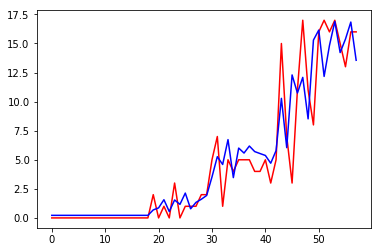

In [24]:
plt.plot(train2.iloc[2:,1:2].values,color='red')
plt.plot(c,color='blue') # Predicted values

In [25]:
num_train = len(date)-5
x_train3 = train3.iloc[:, 1:2].values
scaler3 = MinMaxScaler(feature_range = (0,1))
x_train3 = scaler3.fit_transform(x_train3)
features_set3 = []
labels3 = []
for k in range(3, len(x_train3)):
    features_set3.append(x_train2[k-3:k, 0])
    labels3.append(x_train3[k, 0])
features_set3 = np.array(features_set3)
labels3 = np.array(labels3)
features_set3 = np.reshape(features_set3, (features_set3.shape[0], features_set3.shape[1], 1))

In [26]:
model3 = keras.models.Sequential([
    keras.layers.LSTM(units=100, return_sequences=True, input_shape=(features_set1.shape[1],1)),
    keras.layers.Dropout(0.1),
    keras.layers.LSTM(units=50, return_sequences=True),
    keras.layers.LSTM(units=50, return_sequences=True),
    keras.layers.LSTM(units=50),
    keras.layers.Dense(units=1)
])
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 3, 100)            40800     
_________________________________________________________________
dropout_3 (Dropout)          (None, 3, 100)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 3, 50)             30200     
_________________________________________________________________
lstm_11 (LSTM)               (None, 3, 50)             20200     
_________________________________________________________________
lstm_12 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 111,451
Trainable params: 111,451
Non-trainable params: 0
_________________________________________________________________


In [27]:
model3.compile(optimizer = 'adam', loss = 'mean_squared_error')
model3.fit(features_set3, labels3, epochs = 500) 

Epoch 1/500
57/57 [==============================] - 3s 50ms/step - loss: 0.1003
Epoch 2/500
57/57 [==============================] - 0s 508us/step - loss: 0.0943
Epoch 3/500
57/57 [==============================] - 0s 464us/step - loss: 0.0888
Epoch 4/500
57/57 [==============================] - 0s 478us/step - loss: 0.0832
Epoch 5/500
57/57 [==============================] - 0s 529us/step - loss: 0.0781
Epoch 6/500
57/57 [==============================] - 0s 494us/step - loss: 0.0726
Epoch 7/500
57/57 [==============================] - 0s 532us/step - loss: 0.0665
Epoch 8/500
57/57 [==============================] - 0s 491us/step - loss: 0.0643
Epoch 9/500
57/57 [==============================] - 0s 562us/step - loss: 0.0628
Epoch 10/500
57/57 [==============================] - 0s 488us/step - loss: 0.0621
Epoch 11/500
57/57 [==============================] - 0s 491us/step - loss: 0.0615
Epoch 12/500
57/57 [==============================] - 0s 562us/step - loss: 0.0594
Epoch 13/500
5

57/57 [==============================] - 0s 491us/step - loss: 0.0320
Epoch 100/500
57/57 [==============================] - 0s 434us/step - loss: 0.0319
Epoch 101/500
57/57 [==============================] - 0s 432us/step - loss: 0.0323
Epoch 102/500
57/57 [==============================] - 0s 573us/step - loss: 0.0322
Epoch 103/500
57/57 [==============================] - 0s 545us/step - loss: 0.0321
Epoch 104/500
57/57 [==============================] - 0s 538us/step - loss: 0.0322
Epoch 105/500
57/57 [==============================] - 0s 464us/step - loss: 0.0319
Epoch 106/500
57/57 [==============================] - 0s 515us/step - loss: 0.0319
Epoch 107/500
57/57 [==============================] - 0s 466us/step - loss: 0.0321
Epoch 108/500
57/57 [==============================] - 0s 456us/step - loss: 0.0322
Epoch 109/500
57/57 [==============================] - 0s 571us/step - loss: 0.0319
Epoch 110/500
57/57 [==============================] - 0s 628us/step - loss: 0.0322
Epoch 

57/57 [==============================] - 0s 464us/step - loss: 0.0312
Epoch 197/500
57/57 [==============================] - 0s 433us/step - loss: 0.0315
Epoch 198/500
57/57 [==============================] - 0s 491us/step - loss: 0.0314
Epoch 199/500
57/57 [==============================] - 0s 469us/step - loss: 0.0315
Epoch 200/500
57/57 [==============================] - 0s 483us/step - loss: 0.0313
Epoch 201/500
57/57 [==============================] - 0s 439us/step - loss: 0.0312
Epoch 202/500
57/57 [==============================] - 0s 606us/step - loss: 0.0313
Epoch 203/500
57/57 [==============================] - 0s 596us/step - loss: 0.0312
Epoch 204/500
57/57 [==============================] - 0s 525us/step - loss: 0.0315
Epoch 205/500
57/57 [==============================] - 0s 522us/step - loss: 0.0314
Epoch 206/500
57/57 [==============================] - 0s 443us/step - loss: 0.0313
Epoch 207/500
57/57 [==============================] - 0s 550us/step - loss: 0.0309
Epoch 

57/57 [==============================] - 0s 491us/step - loss: 0.0295
Epoch 294/500
57/57 [==============================] - 0s 491us/step - loss: 0.0293
Epoch 295/500
57/57 [==============================] - 0s 530us/step - loss: 0.0293
Epoch 296/500
57/57 [==============================] - 0s 538us/step - loss: 0.0292
Epoch 297/500
57/57 [==============================] - 0s 489us/step - loss: 0.0295
Epoch 298/500
57/57 [==============================] - 0s 419us/step - loss: 0.0296
Epoch 299/500
57/57 [==============================] - 0s 530us/step - loss: 0.0292
Epoch 300/500
57/57 [==============================] - 0s 573us/step - loss: 0.0289
Epoch 301/500
57/57 [==============================] - 0s 516us/step - loss: 0.0287
Epoch 302/500
57/57 [==============================] - 0s 548us/step - loss: 0.0285
Epoch 303/500
57/57 [==============================] - 0s 541us/step - loss: 0.0289
Epoch 304/500
57/57 [==============================] - 0s 438us/step - loss: 0.0287
Epoch 

57/57 [==============================] - 0s 560us/step - loss: 0.0214
Epoch 391/500
57/57 [==============================] - 0s 491us/step - loss: 0.0227
Epoch 392/500
57/57 [==============================] - 0s 491us/step - loss: 0.0212
Epoch 393/500
57/57 [==============================] - 0s 491us/step - loss: 0.0227
Epoch 394/500
57/57 [==============================] - 0s 454us/step - loss: 0.0221
Epoch 395/500
57/57 [==============================] - 0s 534us/step - loss: 0.0216
Epoch 396/500
57/57 [==============================] - 0s 506us/step - loss: 0.0216
Epoch 397/500
57/57 [==============================] - 0s 545us/step - loss: 0.0226
Epoch 398/500
57/57 [==============================] - 0s 564us/step - loss: 0.0210
Epoch 399/500
57/57 [==============================] - 0s 443us/step - loss: 0.0210
Epoch 400/500
57/57 [==============================] - 0s 554us/step - loss: 0.0210
Epoch 401/500
57/57 [==============================] - 0s 549us/step - loss: 0.0211
Epoch 

57/57 [==============================] - 0s 561us/step - loss: 0.0200
Epoch 488/500
57/57 [==============================] - 0s 491us/step - loss: 0.0204
Epoch 489/500
57/57 [==============================] - 0s 491us/step - loss: 0.0199
Epoch 490/500
57/57 [==============================] - 0s 558us/step - loss: 0.0201
Epoch 491/500
57/57 [==============================] - 0s 444us/step - loss: 0.0209
Epoch 492/500
57/57 [==============================] - 0s 637us/step - loss: 0.0212
Epoch 493/500
57/57 [==============================] - 0s 469us/step - loss: 0.0197
Epoch 494/500
57/57 [==============================] - 0s 563us/step - loss: 0.0196
Epoch 495/500
57/57 [==============================] - 0s 407us/step - loss: 0.0204
Epoch 496/500
57/57 [==============================] - 0s 678us/step - loss: 0.0201
Epoch 497/500
57/57 [==============================] - 0s 433us/step - loss: 0.0206
Epoch 498/500
57/57 [==============================] - 0s 691us/step - loss: 0.0209
Epoch 

In [28]:
predictions3 = []
a = test3.iloc[:, 1:2]
for i in range(len(a) - 2):
    test_inputs = a.values
    test_inputs = scaler3.transform(test_inputs)
    test_features = []
    test_features.append(test_inputs[i:i+3,0])
    test_features=np.array(test_features)
    test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))
    prediction = model3.predict(test_features)
    prediction = scaler3.inverse_transform(prediction)
    predictions3.append(prediction[0][0])

In [29]:
predictions3

[61.30228, 51.260555, 266.37402, 98.325714, 104.61514, 201.55914]

In [30]:
test3

,Date,Recovered
0,57.0,190.0
1,58.0,228.0
2,59.0,111.0
3,60.0,163.0
4,61.0,204.0
5,62.0,192.0
6,63.0,627.0
7,64.0,263.0


In [31]:
c = []
a  = train3.iloc[:,1:2]
for i in range(len(a) - 2):
    test_inputs = a.values
    test_inputs = scaler3.transform(test_inputs)
    test_features = []
    test_features.append(test_inputs[i:i+3,0])
    test_features=np.array(test_features)
    test_features = np.reshape(test_features, (test_features.shape[0], test_features.shape[1], 1))
    prediction = model3.predict(test_features)
    prediction = scaler3.inverse_transform(prediction)
    c.append(prediction[0][0])

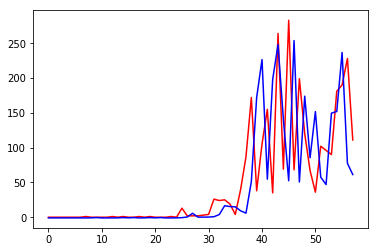

In [32]:
plt.plot(train3.iloc[2:,1:2].values,color='red')
plt.plot(c,color='blue') # Predicted values